## S1-24_MBAZG622T - Project

## Integrating Supervised and Unsupervised Machine learning Algorithms for Credit Risk Assessment

### 2022hb21047 - Madhumithaa N



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
data = pd.read_csv("C:\\Users\\shaiv\\Downloads\\Credit_risk_dataset\\credit_risk_dataset.csv")

data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.shape

(32581, 12)

In [4]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
# Exploratory Data Analysis

In [6]:
# Setting up the visualization style
sns.set(style="whitegrid")

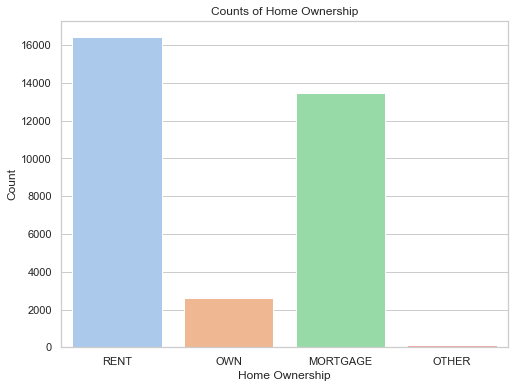

In [7]:
# Bar plot for Home Ownership counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="person_home_ownership", palette="pastel")
plt.title("Counts of Home Ownership")
plt.ylabel("Count")
plt.xlabel("Home Ownership")
plt.show()

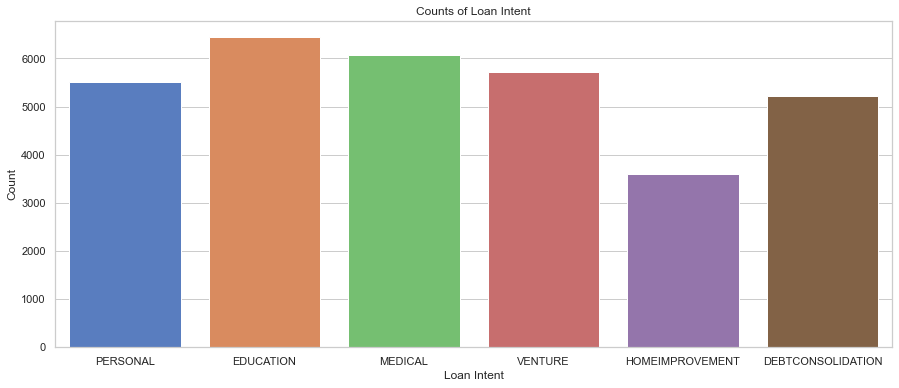

In [8]:
# Bar plot for Loan Intent counts
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x="loan_intent", palette="muted")
plt.title("Counts of Loan Intent")
plt.ylabel("Count")
plt.xlabel("Loan Intent")
plt.show()

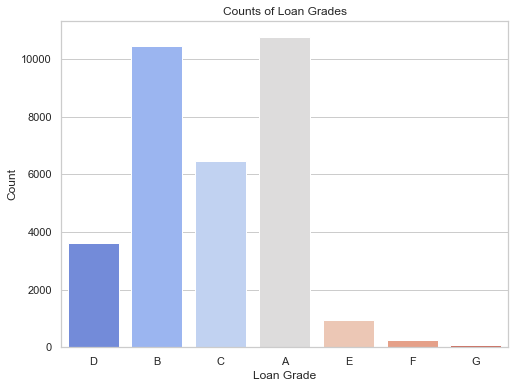

In [9]:
# Bar plot for Loan Grade counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="loan_grade", palette="coolwarm")
plt.title("Counts of Loan Grades")
plt.ylabel("Count")
plt.xlabel("Loan Grade")
plt.show()

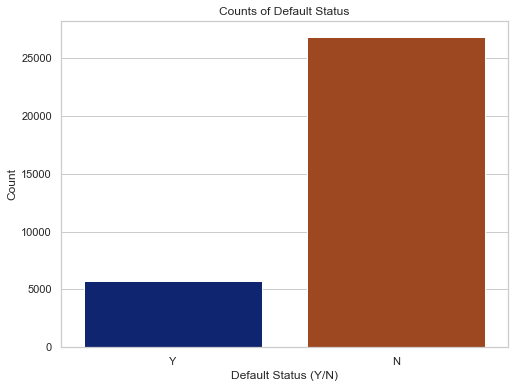

In [10]:
# Bar plot for Default Status counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="cb_person_default_on_file", palette="dark")
plt.title("Counts of Default Status")
plt.ylabel("Count")
plt.xlabel("Default Status (Y/N)")
plt.show()

In [11]:
# 1. Preprocessing

# A. Handling Missing Values
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)


In [12]:
# B. Encoding Categorical Features
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

In [13]:
# C. Feature Scaling
scaler = StandardScaler()
numeric_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [14]:
print(data.dtypes)

person_age                     float64
person_income                  float64
person_emp_length              float64
loan_amnt                      float64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_default_on_file       object
cb_person_cred_hist_length     float64
person_home_ownership_OTHER      uint8
person_home_ownership_OWN        uint8
person_home_ownership_RENT       uint8
loan_intent_EDUCATION            uint8
loan_intent_HOMEIMPROVEMENT      uint8
loan_intent_MEDICAL              uint8
loan_intent_PERSONAL             uint8
loan_intent_VENTURE              uint8
loan_grade_B                     uint8
loan_grade_C                     uint8
loan_grade_D                     uint8
loan_grade_E                     uint8
loan_grade_F                     uint8
loan_grade_G                     uint8
dtype: object


In [15]:
# Convert 'cb_person_default_on_file' from 'Y'/'N' to 1/0
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# Verify the conversion
print(data['cb_person_default_on_file'].value_counts())

0    26836
1     5745
Name: cb_person_default_on_file, dtype: int64


In [16]:
# D. Handle Imbalanced Data
# Define target and features
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [17]:
# Use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [18]:
# 2. Supervised Learning (Classification)

# A. Logistic Regression (Baseline)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      7659
           1       0.82      0.79      0.81      7625

    accuracy                           0.81     15284
   macro avg       0.81      0.81      0.81     15284
weighted avg       0.81      0.81      0.81     15284

Logistic Regression AUC-ROC: 0.8894452256961167


In [19]:
# B. Support Vector Machine
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine - Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Support Vector Machine AUC-ROC:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))

Support Vector Machine - Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7659
           1       0.85      0.83      0.84      7625

    accuracy                           0.84     15284
   macro avg       0.84      0.84      0.84     15284
weighted avg       0.84      0.84      0.84     15284

Support Vector Machine AUC-ROC: 0.9168914916341858


In [20]:
# B. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7659
           1       0.85      0.83      0.84      7625

    accuracy                           0.84     15284
   macro avg       0.84      0.84      0.84     15284
weighted avg       0.84      0.84      0.84     15284

Random Forest AUC-ROC: 0.982325963882628


In [21]:
# C. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7659
           1       0.98      0.92      0.95      7625

    accuracy                           0.95     15284
   macro avg       0.95      0.95      0.95     15284
weighted avg       0.95      0.95      0.95     15284

XGBoost AUC-ROC: 0.9840582021793711


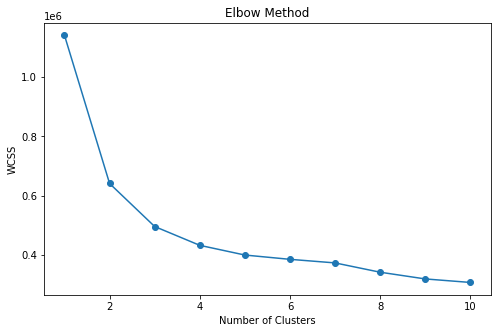

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_resampled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# 3. Unsupervised Learning (Clustering and Anomaly Detection)

# A. K-Means Clustering
#clustering_features = data[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
clustering_features = data.drop('loan_status', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_features)

In [23]:
# Add cluster labels to the dataset

cluster_data=data
cluster_data['risk_cluster'] = clusters
cluster_data['risk_rating'] = clusters

In [24]:
cluster_data['risk_rating'].value_counts()

0    14591
1    14341
2     3649
Name: risk_rating, dtype: int64

In [25]:
# Define target and features
X = cluster_data.drop('loan_status', axis=1)
y = cluster_data['loan_status']

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -0.903374      -0.114143              123.0   4.019404       1.625251   
1   -1.060904      -0.911147                5.0  -1.358650       0.041636   
2   -0.430783      -0.911147                1.0  -0.646849       0.603041   
3   -0.745843      -0.009274                4.0   4.019404       1.368887   
4   -0.588313      -0.188358                8.0   4.019404       1.057357   

   loan_status  loan_percent_income  cb_person_default_on_file  \
0            1                 0.59                          1   
1            0                 0.10                          0   
2            1                 0.57                          0   
3            1                 0.53                          0   
4            1                 0.55                          1   

   cb_person_cred_hist_length  person_home_ownership_OTHER  ...  \
0                   -0.691554                            0  ...   
1     

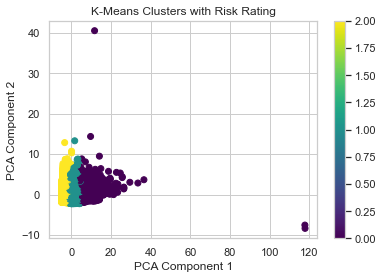

In [30]:
# Reduce dimensions for visualization
from sklearn.decomposition import PCA
print(cluster_data.head())
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data['risk_rating'], cmap='viridis')
plt.title('K-Means Clusters with Risk Rating')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [26]:
# Use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Best Score: 0.9491614221231581


In [29]:
xgb_model_new = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.2,
                        max_depth=7, subsample=1, colsample_bytree=0.8,gamma=0 )
xgb_model_new.fit(X_train, y_train)
y_pred_xgb_new = xgb_model_new.predict(X_test)
print("XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb_new))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, xgb_model_new.predict_proba(X_test)[:, 1]))

XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7659
           1       0.98      0.92      0.95      7625

    accuracy                           0.95     15284
   macro avg       0.95      0.95      0.95     15284
weighted avg       0.95      0.95      0.95     15284

XGBoost AUC-ROC: 0.9864206387428056


In [30]:
# A. Logistic Regression (Baseline)


log_model_new = LogisticRegression(max_iter=1000)
log_model_new.fit(X_train, y_train)
y_pred_log_new = log_model_new.predict(X_test)
print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_log_new))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, log_model_new.predict_proba(X_test)[:, 1]))

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      7659
           1       0.82      0.80      0.81      7625

    accuracy                           0.81     15284
   macro avg       0.81      0.81      0.81     15284
weighted avg       0.81      0.81      0.81     15284

Logistic Regression AUC-ROC: 0.8901371449853275


In [31]:
# B. Support Vector Machine
svm_model_new = SVC(random_state=42, probability=True)
svm_model_new.fit(X_train, y_train)
y_pred_svm_new = svm_model_new.predict(X_test)
print("Support Vector Machine - Classification Report")
print(classification_report(y_test, y_pred_svm_new))
print("Support Vector Machine:", roc_auc_score(y_test, svm_model_new.predict_proba(X_test)[:, 1]))

Support Vector Machine - Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      7659
           1       0.85      0.83      0.84      7625

    accuracy                           0.84     15284
   macro avg       0.84      0.84      0.84     15284
weighted avg       0.84      0.84      0.84     15284

Support Vector Machine: 0.9174807651557473


In [32]:
# B. Random Forest
rf_model_new = RandomForestClassifier(random_state=42)
rf_model_new.fit(X_train, y_train)
y_pred_rf_new = rf_model_new.predict(X_test)
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf_new))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, rf_model_new.predict_proba(X_test)[:, 1]))

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7659
           1       0.96      0.90      0.93      7625

    accuracy                           0.93     15284
   macro avg       0.94      0.93      0.93     15284
weighted avg       0.94      0.93      0.93     15284

Random Forest AUC-ROC: 0.9830497582400647
